# Budget64

## Visualising

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import underscore as __
import underscore.Plotly as px

reload(__)
reload(px)

plt.style.use('seaborn')
from numpy.core.defchararray import add as npStrAdd
tdata = pd.read_pickle('Transaction.pkl')
bdata = pd.read_pickle('Budget.pkl')
months = np.array(['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

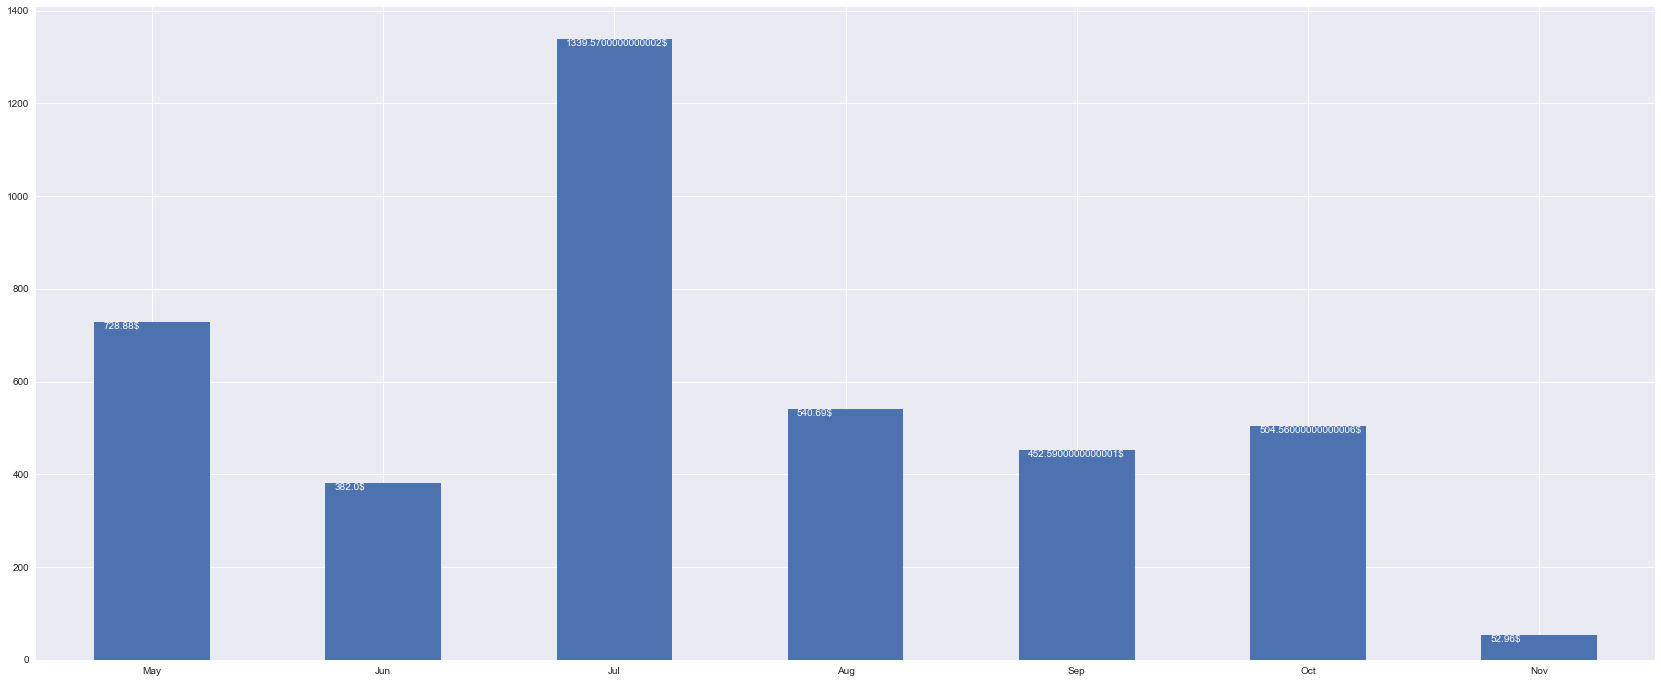

In [2]:
cat = 'Shopping'
year = 2019

mask = (tdata['Date'].dt.year == year) & (tdata['Category'] == cat)
df = tdata[mask]
grouped = df.groupby(by=df['Date'].dt.month)['Amt'].sum()
grouped.index = pd.CategoricalIndex(months[grouped.index])

fig, ax = plt.subplots(figsize=(29,12))
ax = grouped.plot.bar(x='Date', y='Amt', rot=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()) + '$', (p.get_x()+0.04, p.get_height() - 15), c='white')

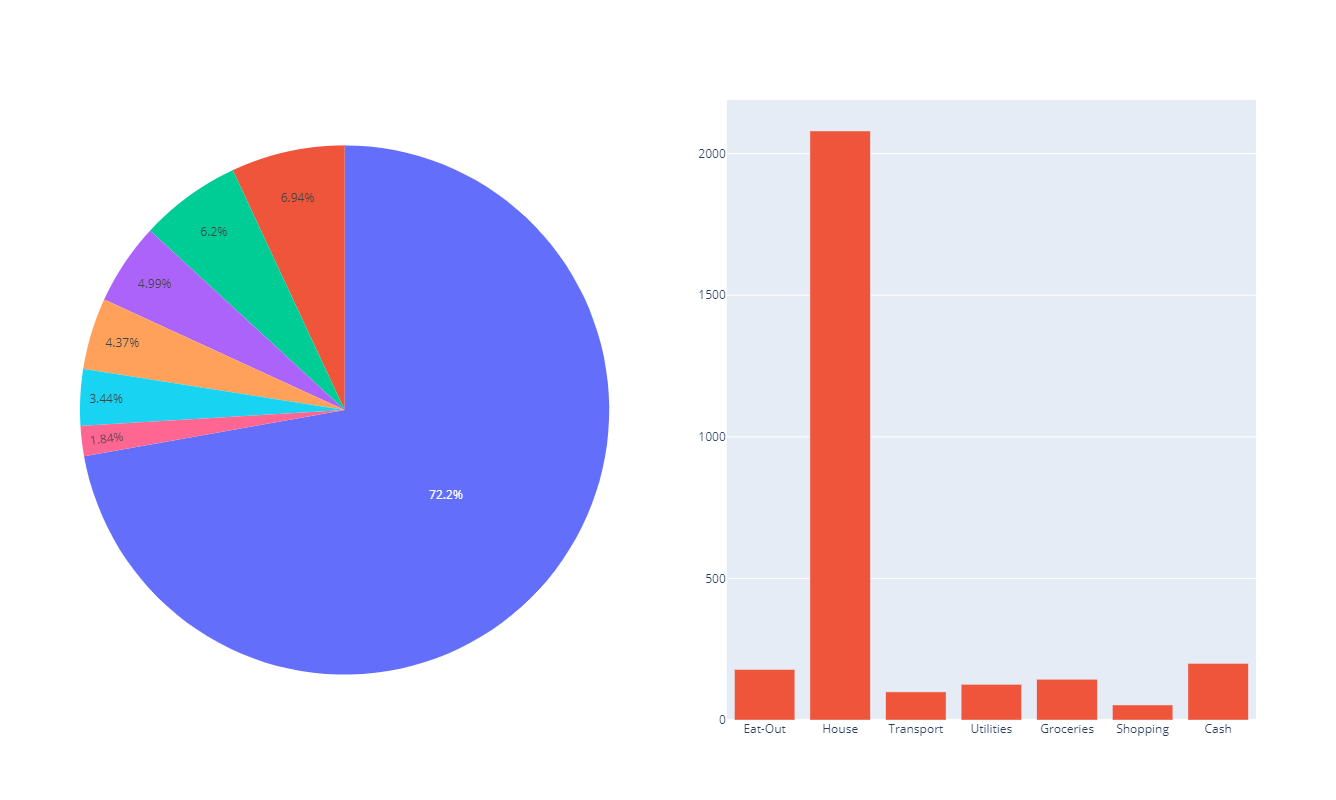

In [51]:
month = 11
year  = 2019
reload(px)

tmask = (tdata['Date'].dt.year  == year) & (tdata['Date'].dt.month == month)
bmask = (bdata['Month'].dt.year == year) & (bdata['Month'].dt.month == month)
df = tdata[tmask]
budget = bdata[bmask]['Budget']
budget.index = pd.CategoricalIndex(bdata[bmask]['Category'])

cats = df['Category'].unique().astype('str')
total = np.zeros(cats.shape)
for i in range(cats.shape[0]):
    total[i] = df[df['Category'] == cats[i]]['Amt'].sum()
    
fig, ax = px.subplots(1, 2, specs=[[{'type':'domain'}, {}]])
    
ax[0][0].pie(values=total, labels=cats)
ax[0][1].bar(values=total, labels=cats)

fig.show()